In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# EDA - Investigation of structure, quality and content

## Load dataset

In [2]:
#import dataset
#dataset .xlsx sudah diclean di excel
#https://gis.bnpb.go.id/
df = pd.read_csv('./dataset/PetaBencana_Dataset.csv')
df

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,94941,01/01/2020,0:03:02,grasp,confirmed,2042596d-b551-4ef2-803d-1ee964cf2278,https://images.petabencana.id/2042596d-b551-4e...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",...,3.174020e+09,3174020.0,3174.0,31.0,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,10.676.866,-616.978
1,95061,01/01/2020,0:43:02,grasp,confirmed,5a0ad45f-7020-43b7-882f-672487ebc6d8,https://images.petabencana.id/5a0ad45f-7020-43...,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.275061e+09,3275061.0,3275.0,32.0,Pejuang,Medan Satria,Bekasi,Jawa Barat,10.697.870,-617.944
2,95062,01/01/2020,1:14:53,grasp,confirmed,e065b40d-2084-48d6-b42f-1f98cb33e4cc,NaN,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",...,3.172060e+09,3172060.0,3172.0,31.0,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,10.689.100,-623.449
3,95063,01/01/2020,1:15:08,grasp,confirmed,7cb26903-b1c8-4be7-8b81-7014c8a83fbd,https://images.petabencana.id/7cb26903-b1c8-4b...,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.216061e+09,3216061.0,3216.0,32.0,Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,10.716.189,-630.170
4,95064,01/01/2020,1:18:03,grasp,confirmed,570d2cb8-d5b6-404f-86ef-8a2a0d27f391,https://images.petabencana.id/570d2cb8-d5b6-40...,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...","{ ""district_id"": ""3173"", ""local_area_id"": ""193...",...,3.173060e+09,3173060.0,3173.0,31.0,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,10.686.092,-616.859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,299721,28/12/2021,01:23:43.144,grasp,confirmed,8f41806c-9d86-47a8-b52a-28cf0ec0a0be,https://images.petabencana.id/8f41806c-9d86-47...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,6.404054e+09,6404054.0,6404.0,64.0,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,1.176.655.040,13.510.431
4231,299723,28/12/2021,08:00:13.901,grasp,confirmed,d1bcdbc7-1819-41aa-b5fe-34d0162bb084,NaN,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }","{ ""district_id"": ""3173"", ""local_area_id"": ""678...",...,3.173070e+09,3173070.0,3173.0,31.0,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,1.068.276.215,-61.573.981
4232,299724,28/12/2021,10:49:48.763,grasp,confirmed,ee548663-23ad-4adb-8d85-f8c64b1fbb6c,https://images.petabencana.id/ee548663-23ad-4a...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.207111e+09,3207111.0,3207.0,32.0,Purwajaya,Purwadadi,Ciamis,Jawa Barat,1.086.955.703,-74.600.767
4233,299726,29/12/2021,07:22:30.000,detik,confirmed,https://pasangmata.detik.com/contribution/363227,https://akcdn.detik.net.id/community/pasma/202...,flood,NaN,"{ ""district_id"": ""3172"", ""local_area_id"": ""267...",...,3.172040e+09,3172040.0,3172.0,31.0,Cipinang Melayu,Makasar,Jakarta Timur,Daerah Khusus Ibukota Jakarta,1.069.163.134,-62.516.120


## 1. Structure Investigation
-  Exploring the general shape of the dataset, as well as the data types of your features.

In [3]:
# Show size of the dataset
df.shape
# conc: we know we have 4235 samples and 21 attrs

(4235, 21)

In [4]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

object     16
float64     4
int64       1
dtype: int64

### 1.1. Structure of non-numerical features

In [5]:
# Display non-numerical features
df.select_dtypes(exclude="number").head()

,date,time,source,status,url,image_url,disaster_type,report_dat,tags,title,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,01/01/2020,0:03:02,grasp,confirmed,2042596d-b551-4ef2-803d-1ee964cf2278,https://images.petabencana.id/2042596d-b551-4e...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",NaN,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,10.676.866,-616.978
1,01/01/2020,0:43:02,grasp,confirmed,5a0ad45f-7020-43b7-882f-672487ebc6d8,https://images.petabencana.id/5a0ad45f-7020-43...,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",NaN,Pejuang,Medan Satria,Bekasi,Jawa Barat,10.697.870,-617.944
2,01/01/2020,1:14:53,grasp,confirmed,e065b40d-2084-48d6-b42f-1f98cb33e4cc,NaN,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",NaN,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,10.689.100,-623.449
3,01/01/2020,1:15:08,grasp,confirmed,7cb26903-b1c8-4be7-8b81-7014c8a83fbd,https://images.petabencana.id/7cb26903-b1c8-4b...,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",NaN,Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,10.716.189,-630.170
4,01/01/2020,1:18:03,grasp,confirmed,570d2cb8-d5b6-404f-86ef-8a2a0d27f391,https://images.petabencana.id/570d2cb8-d5b6-40...,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...","{ ""district_id"": ""3173"", ""local_area_id"": ""193...",NaN,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,10.686.092,-616.859


In [6]:
df.describe(exclude="number").transpose()

# unique value: url, image_url, tags, report, long, lat
# non-unique value: disaster_type, source, provinsi, kabupaten, date, time,  ID_Desa, ID_Kec, Desa, Kecamatan
# irrelevant: title, status
# can be change to number : disaster_type

,count,unique,top,freq
date,4235,463,25/02/2020,423
time,4235,2497,1,838
source,4235,3,grasp,3382
status,4235,1,confirmed,4235
url,3570,3565,fe75c34a-22d4-47b9-9133-d3c019c5ec18,2
image_url,3334,3249,https://lh3.googleusercontent.com/1nth291CbgiX...,4
disaster_type,4235,6,flood,4008
report_dat,3455,558,"{ ""report_type"": ""flood"", ""flood_depth"": 44 }",198
tags,4235,1006,"{ ""district_id"": null, ""local_area_id"": null, ...",640
title,188,187,"Jalan Pati-Tayu Banjir, Beberapa Kendaraan Mogok",2


In [7]:
# normalize 'tags' column from json to new table
tag = []
for i in df['tags']:
    tag.append(json.loads(i))

tag = pd.json_normalize(tag)
tag

# too many missing value

,district_id,local_area_id,instance_region_code
0,3174,125,ID-JK
1,None,None,ID-JK
2,3172,1789,ID-JK
3,None,None,ID-JK
4,3173,193,ID-JK
...,...,...,...
4230,None,None,ID-KI
4231,3173,678,ID-JK
4232,None,None,ID-JB
4233,3172,2674,ID-JK


In [8]:
# normalize 'report_dat' column from json to new table
report = []
df['report_dat'] = df['report_dat'].astype(str)

for i in df['report_dat']:
    if(i != 'nan'):
        report.append(json.loads(i))
    else:
        report.append(json.loads(str({})))

report = pd.json_normalize(report)
report

# keep report variable

,report_type,flood_depth,points,structureFailure,accessabilityFailure,condition,impact,fireDistance,fireLocation.lat,fireLocation.lng,personLocation.lat,personLocation.lng,fireRadius.lat,fireRadius.lng,volcanicSigns,evacuationNumber,evacuationArea,visibility,airQuality
0,flood,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,flood,80.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,flood,51.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,flood,100.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,flood,15.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,flood,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4231,flood,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4232,flood,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
report['report_type'].unique()

array(['flood', nan, 'structure', 'road', 'wind', 'fire', 'volcano',
       'haze'], dtype=object)

In [10]:
# replace disaster type with a number value
# 1 -> flood, 2-> earthquake, 3 -> wind, 4 -> fire, 5 -> volcano, 6 -> haze
df['disaster_type'].replace(['flood', 'earthquake', 'wind', 'fire', 'volcano', 'haze'], [1, 2, 3, 4, 5, 6], inplace=True)
#replace also report table
# 1 -> flood, 2-> structure, 3 -> road 4 -> wind, 5 -> fire, 6 -> volcano, 7 -> haze
report['report_type'].replace(['flood', 'structure', 'road', 'wind', 'fire', 'volcano', 'haze'], [1, 2, 3, 4, 5, 6, 7], inplace=True)

In [11]:
df.sample(3)

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
1616,109135,25/02/2020,0,grasp,confirmed,0fe48305-92f7-40e1-837e-4b46b62d749f,NaN,1,"{ ""report_type"": ""flood"", ""flood_depth"": 131 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.275020e+09,3275020.0,3275.0,32.0,Jatimekar,Jatiasih,Bekasi,Jawa Barat,10.695.170,-628.701
3701,285529,05/04/2021,3:57:19,grasp,confirmed,4044f955-7250-439e-bbf2-87091d25c77b,https://images.petabencana.id/4044f955-7250-43...,1,"{ ""points"": 1, ""flood_depth"": 199, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",...,5.302061e+09,5302061.0,5302.0,53.0,Maidang,Kambata Mapambuhang,Sumba Timur,Nusa Tenggara Timur,12.015.241,-979.553
3710,285589,08/04/2021,3:38:00,grasp,confirmed,6b6b7ec1-ece6-4416-9c52-287e121cb691,https://images.petabencana.id/6b6b7ec1-ece6-44...,1,"{ ""report_type"": ""flood"", ""flood_depth"": 44 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,5.307030e+09,5307030.0,5307.0,53.0,Kiraman,Alor Selatan,Alor,Nusa Tenggara Timur,12.476.083,-838.509


In [12]:
report.sample(3)
#irrelevant : personLocation.lat, personLocation.lang, fireRadius.lat, fireRadius.lng, visibility, airQuality, evacuationNumber, vol

,report_type,flood_depth,points,structureFailure,accessabilityFailure,condition,impact,fireDistance,fireLocation.lat,fireLocation.lng,personLocation.lat,personLocation.lng,fireRadius.lat,fireRadius.lng,volcanicSigns,evacuationNumber,evacuationArea,visibility,airQuality
3652,1.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,1.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,1.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# delete irrelevant column from report
report = report.drop(columns=['personLocation.lat', 'personLocation.lng', 'fireLocation.lat', 'fireLocation.lng', 'fireDistance', 'points', 'fireRadius.lat', 'fireRadius.lng', 'volcanicSigns', 'evacuationNumber', 'evacuationArea'])
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   report_type           3382 non-null   float64
 1   flood_depth           3155 non-null   float64
 2   structureFailure      82 non-null     float64
 3   accessabilityFailure  49 non-null     float64
 4   condition             49 non-null     float64
 5   impact                64 non-null     float64
 6   visibility            2 non-null      float64
 7   airQuality            2 non-null      float64
dtypes: float64(8)
memory usage: 264.8 KB


### 1.2 Structure of numerical features

<AxesSubplot:title={'center':'Unique value per features'}>

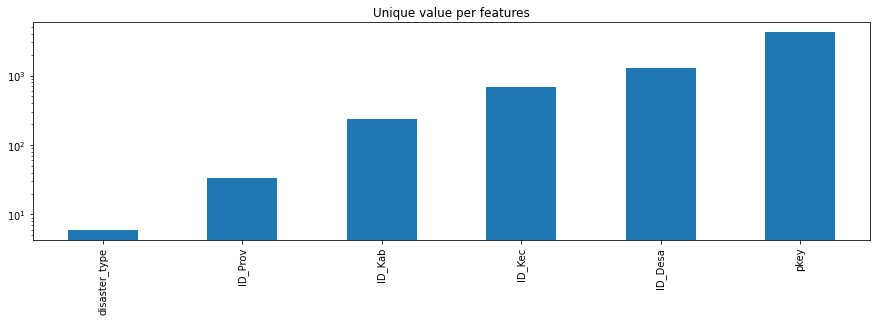

In [14]:
#table 1
# For each numerical feature compute number of unique entries
unique_val = df.select_dtypes(include="number").nunique().sort_values()
# Plot information with y-axis in log-scale
unique_val.plot.bar(logy=True, figsize=(15,4), title="Unique value per features")

#pkey is not relevant

In [15]:
# numerical dscribe - set percentile
pct_num_list = [i/10 for i in range(1, 10)]
df.describe(include="number", percentiles=pct_num_list).transpose()

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
pkey,4235.0,1.836391e+05,7.480413e+04,9.494100e+04,1.020904e+05,1.084998e+05,1.089252e+05,1.095296e+05,1.904520e+05,2.244958e+05,2.405904e+05,2.605222e+05,2.961676e+05,2.997280e+05
disaster_type,4235.0,1.089020e+00,4.345276e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
ID_Desa,4227.0,3.561485e+09,1.090398e+09,1.103030e+09,3.171090e+09,3.172070e+09,3.173040e+09,3.174020e+09,3.175020e+09,3.211010e+09,3.275041e+09,3.515140e+09,5.206030e+09,9.420020e+09
ID_Kec,4227.0,3.561485e+06,1.090398e+06,1.103030e+06,3.171090e+06,3.172070e+06,3.173040e+06,3.174020e+06,3.175020e+06,3.211010e+06,3.275041e+06,3.515140e+06,5.206030e+06,9.420020e+06
ID_Kab,4227.0,3.561425e+03,1.090400e+03,1.103000e+03,3.171000e+03,3.172000e+03,3.173000e+03,3.174000e+03,3.175000e+03,3.211000e+03,3.275000e+03,3.515000e+03,5.206000e+03,9.420000e+03
ID_Prov,4227.0,3.502579e+01,1.100953e+01,1.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.200000e+01,3.200000e+01,3.500000e+01,5.200000e+01,9.400000e+01


###. 1.3 Conclutions of structure investigation
1. 4235 x 21 data shape
2. changed data type of 'long' & 'lat' into float62
3. delete status, title, tags, pkey, url, image_url, time, and report_dat column
4. replace 'disaster_type' with a number value
    (1 -> flood, 2-> earthquake, 3 -> wind, 4 -> fire, 5 -> volcano, 6 -> haze)

## Quality Investigation
-  Get a feeling for the general quality of the dataset, with regards to duplicates, missing values and unwanted entries.

### 2.1 Duplicates

In [16]:
#table 1
# Check number of duplicates
duplicateRow = df[df.duplicated()]
duplicateRow

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
740,106393,20/02/2020,0,grasp,confirmed,d9eb102c-87ff-4c08-9a58-a9751077007d,https://images.petabencana.id/d9eb102c-87ff-4c...,1,"{ ""report_type"": ""flood"", ""flood_depth"": 28 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.320080e+09,3320080.0,3320.0,33.0,Kauman,Jepara,Jepara,Jawa Tengah,11.066.711,-659.151
742,106394,20/02/2020,0,grasp,confirmed,fe75c34a-22d4-47b9-9133-d3c019c5ec18,NaN,1,"{ ""report_type"": ""flood"", ""flood_depth"": 35 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.216090e+09,3216090.0,3216.0,32.0,Bahagia,Babelan,Bekasi,Jawa Barat,10.701.201,-618.004
744,106396,20/02/2020,0,grasp,confirmed,6918e92d-413e-4bd6-a6d3-2b9f48746de5,NaN,1,"{ ""report_type"": ""flood"", ""flood_depth"": 75 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.275041e+09,3275041.0,3275.0,32.0,Pengasinan,Rawalumbu,Bekasi,Jawa Barat,10.700.857,-626.569
746,106413,20/02/2020,0,detik,confirmed,https://pasangmata.detik.com/contribution/349282,https://akcdn.detik.net.id/community/pasma/202...,1,nan,"{ ""district_id"": null, ""local_area_id"": null, ...",...,3.318040e+09,3318040.0,3318.0,33.0,Winong,Winong,Pati,Jawa Tengah,11.110.174,-680.686
3856,296671,28/08/2021,20:51:13,grasp,confirmed,f4a875e0-0186-457b-ab80-a4b7be0c1aed,https://images.petabencana.id/f4a875e0-0186-45...,1,"{ ""report_type"": ""flood"", ""flood_depth"": 90 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,7.313120e+09,7313120.0,7313.0,73.0,Benteng,Pitumpanua,Wajo,Sulawesi Selatan,120.384.104,-3.735.155


In [17]:
#drop duplicates values
df.drop_duplicates(ignore_index=True,inplace=True)
df.shape

(4230, 21)

In [18]:
# delete irrelevant column from table 1
df = df.drop(columns=['Desa', 'Kecamatan', 'status','title', 'tags', 'pkey', 'url', 'image_url', 'ID_Desa', 'ID_Kec','ID_Kab', 'ID_Prov', 'time', 'report_dat'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4230 non-null   object
 1   source         4230 non-null   object
 2   disaster_type  4230 non-null   int64 
 3   Kabupaten      4223 non-null   object
 4   Provinsi       4223 non-null   object
 5   long           4230 non-null   object
 6   lat            4230 non-null   object
dtypes: int64(1), object(6)
memory usage: 231.5+ KB


In [19]:
#rename all column of all table
df.columns = ['date', 'src', 'type', 'kab', 'prov', 'long', 'lat']

### 2.2 Missing Values

1. Per Sample on table 1

In [20]:
df.isna().sum()

date    0
src     0
type    0
kab     7
prov    7
long    0
lat     0
dtype: int64

In [21]:
#Make sure mode of kab and prov valid
modus_kab = df['kab'].mode()[0]
modus_prov = df['prov'].mode()[0]
print(f"modus_kab = {modus_kab}, modus_prov = {modus_prov}")

modus_kab = Jakarta Timur, modus_prov = Daerah Khusus Ibukota Jakarta


In [22]:
df['kab'] = df['kab'].fillna(modus_kab)

In [23]:
df['prov'] = df['prov'].fillna(modus_prov)

In [24]:
df.isna().sum()

date    0
src     0
type    0
kab     0
prov    0
long    0
lat     0
dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5796937-50eb-437b-95bb-507260916b44' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>